In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pickle
from plotting import colored_line
import seaborn as sns

In [2]:
# Get all the linear sweeps to average over
with open("../results/linear_contrast_sweep_0.pkl", "rb") as f:
    _, linear_contrast_sweep_0 = pickle.load(f)
with open("../results/linear_contrast_sweep_123.pkl", "rb") as f:
    _, linear_contrast_sweep_123 = pickle.load(f)
with open("../results/linear_contrast_sweep_321.pkl", "rb") as f:
    _, linear_contrast_sweep_321 = pickle.load(f)
linear_levels = linear_contrast_sweep_0.keys()

linear_contrast_sweep_0_arr = np.array(list(linear_contrast_sweep_0.values())).squeeze()
linear_contrast_sweep_123_arr = np.array(list(linear_contrast_sweep_123.values())).squeeze()
linear_contrast_sweep_321_arr = np.array(list(linear_contrast_sweep_321.values())).squeeze()
linear_sweeps = np.stack([linear_contrast_sweep_0_arr, linear_contrast_sweep_123_arr, linear_contrast_sweep_321_arr], axis=0)
linear_sweep_means = np.mean(linear_sweeps, axis=0)
linear_sweep_sems = np.std(linear_sweeps, axis=0) / np.sqrt(linear_sweeps.shape[0])

In [3]:
# Get all the biophys sweeps to average over
with open("../results/contrast_sweep_66.pkl", "rb") as f:
    biophys_levels, biophys_contrast_sweep_66 = pickle.load(f)
with open("../results/contrast_sweep_77.pkl", "rb") as f:
    biophys_levels, biophys_contrast_sweep_77 = pickle.load(f)
with open("../results/contrast_sweep_0.pkl", "rb") as f:
    biophys_levels, biophys_contrast_sweep = pickle.load(f)

biophys_sweeps = np.stack([biophys_contrast_sweep_66, biophys_contrast_sweep_77, biophys_contrast_sweep], axis=0)
biophys_sweep_means = np.mean(biophys_sweeps, axis=0)
biophys_sweep_sems = np.std(biophys_sweeps, axis=0) / np.sqrt(biophys_sweeps.shape[0])

In [4]:
# Load the mlp baseline as well
with open("../results/mlp_contrast_sweep_77.pkl", "rb") as f:
    _, mlp_baseline = pickle.load(f)
mlp_levels = np.squeeze(np.array(list(mlp_baseline.keys())))
mlp_accs = np.squeeze(np.array(list(mlp_baseline.values())))

In [5]:
# Load the initialization baseline
with open("../results/contrast_sweep_77_init_control.pkl", "rb") as f:
    init_levels, init_sweep = pickle.load(f)
init_sweep = np.squeeze(np.array(init_sweep))

In [6]:
# Load the layernorm baseline
with open("../results/normalizing_logistic_contrast_sweep_77.pkl", "rb") as f:
    _, norm_sweep = pickle.load(f)
norm_levels = np.squeeze(np.array(list(norm_sweep.keys())))
norm_sweep = np.squeeze(np.array(list(norm_sweep.values())))

In [7]:
# Load with threshold function baseline
with open("../results/thresholding_logistic_contrast_sweep_77.pkl", "rb") as f:
    _, threshold_sweep = pickle.load(f)
threshold_levels = np.squeeze(np.array(list(threshold_sweep.keys())))
threshold_sweep = np.squeeze(np.array(list(threshold_sweep.values())))

In [8]:
with open("../results/fig4_coneact_209.pkl", "rb") as f:
    activity_levels, cone_activities = pickle.load(f)

with open("../results/all_state_vars.pkl", "rb") as f:
    state_var_data = pickle.load(f)

# Phototransduction cacsade state vars
state_var_data["rec_vars"]
cascade_vars = ["R", "P", "G", "C", "I", "pr_v"]
ptc_inds = [list(state_var_data["rec_vars"]).index(v) for v in cascade_vars]
state_var_data["rec_vars"], ptc_inds

(array(['C', 'G', 'I', 'IP', 'P', 'R', 'RP', 'RRP', 'S', 'Stim', 'exo',
        'pr_v', 'readout0_v', 'readout1_v', 'readout2_v', 'readout3_v',
        'readout4_v', 'readout5_v', 'readout6_v', 'readout7_v',
        'readout8_v', 'readout9_v'], dtype='<U10'),
 [5, 4, 1, 0, 2, 11])

In [9]:
# Choose 3 cones to plot, 295 comes from the cone where we plotted the state vars, the other cones are as before
for_plotting = [295, 288, 32]

In [10]:
with open("../results/state_var_solns.pkl", "rb") as f:
    soln_avgs = pickle.load(f)
rec_vars = np.flip(soln_avgs['vars'])
state_means = np.flip(soln_avgs['means'])
state_sems = np.flip(soln_avgs['sems'])

['R' 'P' 'G' 'C' 'I' 'v' 'glu'] ['R(t)', 'P(t)', 'G(t)', 'C(t)', 'I$_{\\mathrm{photo}}$(t)', 'V(t)', 'Glu$_{\\mathrm{exo}}$(t)']


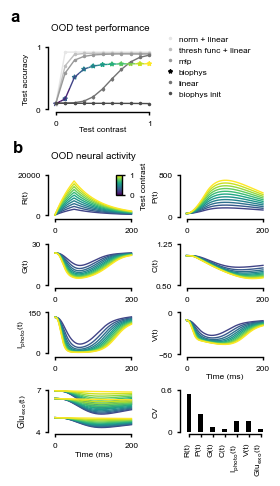

In [ ]:
kwargs_text = {'fontsize': 12, 'font': 'Arial', 'fontweight': 'heavy'}
colors = plt.cm.viridis(np.linspace(0.2, 1, num=len(linear_levels)))
baseline_colors = plt.cm.binary(np.linspace(0.1, 0.7, num=5))

with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, axs = plt.subplot_mosaic(
        """
        AA
        BC
        DE
        FG
        HI
        """, 
        figsize=(2.6, 4.75), 
        layout="constrained",
        height_ratios=[1.5, 1, 1, 1, 1],
        )
    fig.get_layout_engine().set(w_pad=-0.75, h_pad=0.04) # doesn't do a lot

    # Layer norm baseline
    axs['A'].plot(
        norm_levels,
        norm_sweep,
        marker=".",
        color=baseline_colors[0],
        label="norm + linear"
    )
    # Threshold baseline
    axs['A'].plot(
        threshold_levels,
        threshold_sweep,
        marker=".",
        color=baseline_colors[1],
        label="thresh func + linear"
    )
    # MLP baseline
    axs['A'].plot(
        mlp_levels,
        mlp_accs,
        marker='.',
        color=baseline_colors[2],
        label="mlp"
    )
    # Linear baseline
    axs['A'].plot(
        linear_levels, 
        linear_sweep_means,
        marker=".",
        color=baseline_colors[3],
        label="linear",
        )
    axs['A'].errorbar(
        linear_levels,
        linear_sweep_means,
        yerr=linear_sweep_sems,
        color=baseline_colors[3],
        linestyle="None"
        )
    # Biophysical init
    axs['A'].errorbar(
        init_levels,
        init_sweep,
        marker=".",
        color=baseline_colors[4],
        label="biophys init"
    )
    colored_line(biophys_levels, biophys_contrast_sweep, np.linspace(0.2, 1, num=len(linear_levels)), axs['A'], cmap="viridis")
    axs['A'].scatter(
        biophys_levels, 
        biophys_contrast_sweep,
        color=colors,
        marker="*",
        label="biophys"
        )
    axs['A'].errorbar(
        biophys_levels,
        biophys_sweep_means,
        yerr=biophys_sweep_sems,
        color="k",
        linestyle="None"
        )
    # MAKE ROOM FOR LEGEND
    divider = make_axes_locatable(axs['A'])
    cax = divider.append_axes("right", size="100%", pad=0.1)
    cax.set_axis_off()
    cax.patch.set_alpha(0.0)
    # Create the legend elements
    norm_dot = mpl.lines.Line2D([], [], color=baseline_colors[0], marker='.', linestyle='None', label='norm + linear')
    thresh_dot = mpl.lines.Line2D([], [], color=baseline_colors[1], marker='.', linestyle='None', label='thresh func + linear')
    mlp_dot = mpl.lines.Line2D([], [], color=baseline_colors[2], marker='.', linestyle='None', label='mlp')
    black_star = mpl.lines.Line2D([], [], color='black', marker='*', linestyle='None', label='biophys')
    linear_dot = mpl.lines.Line2D([], [], color=baseline_colors[3], marker='.', linestyle='None', label='linear')
    bioinit_dot = mpl.lines.Line2D([], [], color=baseline_colors[4], marker='.', linestyle='None', label='biophys init')
    axs['A'].legend(
        handles=[norm_dot, thresh_dot, mlp_dot, black_star, linear_dot, bioinit_dot], 
        loc="upper left", 
        bbox_to_anchor=(1.0, 1.3),
        handletextpad=0.1
        )
    ylab_pad = -8
    axs['A'].set_ylabel("Test accuracy", labelpad=ylab_pad)
    axs['A'].set_xlabel("Test contrast", labelpad=0)
    axs['A'].spines["bottom"].set_bounds(0, 1)
    axs['A'].set_ylim(0., 1.0)
    axs['A'].set_yticks([0., 1.0])
    axs['A'].set_xticks([0, 1])
    sns.despine(offset=2)

    # Glutamate trace plotting
    time = np.arange(0, 200, 0.025)
    for i in range(len(activity_levels)):
        for n, j in enumerate(for_plotting):
            axs['H'].plot(time, cone_activities[i][j, :], color=colors[i])

    time_labelpad = 2
    axs['H'].spines["bottom"].set_bounds(0, 200)
    axs['H'].set_xticks([0, 200])
    axs['H'].set_xlabel("Time (ms)", labelpad=time_labelpad)
    axs['H'].set_ylabel(r"$\mathrm{Glu_{exo}}$(t)", labelpad=ylab_pad)
    axs['H'].set_ylim(4, 7)
    axs['H'].set_yticks([4, 7])

    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(0, 1))
    sm.set_array([])  # Empty array for the mappable
    cax = axs['B'].inset_axes([160, 10_000, 15, 10_000], transform=axs['B'].transData)
    cbar = fig.colorbar(sm, cax=cax, orientation='vertical')
    cbar.set_ticks([0, 1])
    cbar.set_label("Test contrast", labelpad=5)

    # Plot the state var data
    y_lbs = [0, 0, 0, 0.5, 0, -50]
    y_ubs = [20_000, 800, 30, 1.25, 150, 0]
    ylabs = ["R(t)", "P(t)", "G(t)", "C(t)", "I$_{\mathrm{photo}}$(t)", "V(t)"]

    state_inds = ['B', 'C', 'D', 'E', 'F', 'G']
    for i, con in enumerate(state_var_data["solns"]):
        for j, ind in enumerate(ptc_inds):
            axs[state_inds[j]].plot(time, state_var_data["solns"][con][ind, :], color=colors[i])

    ylab_pad2 = -2
    for i in range(6):
        axs[state_inds[i]].spines["left"].set_bounds(y_lbs[i], y_ubs[i])
        axs[state_inds[i]].set_yticks([y_lbs[i], y_ubs[i]])
        axs[state_inds[i]].spines["bottom"].set_bounds(0, 200)
        axs[state_inds[i]].set_xticks([0, 200])
        if i in [0, 2, 4]:
            axs[state_inds[i]].set_ylabel(ylabs[i], labelpad=ylab_pad)
        else:
            axs[state_inds[i]].set_ylabel(ylabs[i], labelpad=ylab_pad2)

    axs['H'].set_xlabel("Time (ms)", labelpad=time_labelpad)
    axs['G'].set_xlabel("Time (ms)", labelpad=time_labelpad)

    ylabs = ["R(t)", "P(t)", "G(t)", "C(t)", "I$_{\mathrm{photo}}$(t)", "V(t)", "Glu$_{\mathrm{exo}}$(t)"]
    print(np.flip(rec_vars)[1:], ylabs)
    axs['I'].bar(np.flip(rec_vars)[1:], np.flip(state_means)[1:], width=0.4, xerr=np.flip(state_sems)[1:], color="k") # fill=False
    axs['I'].set_xticks(np.arange(7))
    axs['I'].set_xticklabels(ylabs, rotation=90, ha='right', va='baseline', rotation_mode='anchor')
    axs['I'].spines['bottom'].set_bounds(0, 6)
    axs['I'].set_yticks([0, 0.6], [0, 0.6])
    axs['I'].set_ylabel("CV", labelpad=ylab_pad2)
    
    axs['A'].set_title("OOD test performance", fontsize=7, pad=12, loc='left')
    axs['B'].set_title("OOD neural activity", fontsize=7, pad=12, loc='left')

    fig.align_ylabels()

    axs['A'].text(-0.4, 1.41, "a", transform=axs['A'].transAxes, **kwargs_text)
    axs['B'].text(-0.45, 1.55, "b", transform=axs['B'].transAxes, **kwargs_text)

    plt.savefig(f"../fig/fig4_rev.svg")
    plt.savefig(f"../fig/fig4_rev.png", dpi=300)
    plt.savefig("../fig/fig4_rev.pdf", format="pdf", bbox_inches="tight")
    plt.show()